## ANLY-590 HW-1  
### Author: Zhe Zhou (zz221@georgetown.edu)


### 1.1 Lasso

* Use LASSO regression to predict Salary from the other numeric predictors.
  Create a visualization of the coefficient trajectories. 

* Comment on which are the final three predictors that remain in the model. 

* Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in
  that model?

In [21]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

# read the dataset
Hitters = pd.read_csv("Hitters.csv")
Hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


Text(0.5, 1.0, 'Lasso Coefficients Trajectory')

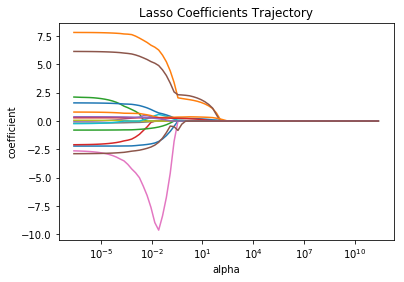

In [38]:
### Use LASSO regression to predict Salary from the other numeric predictors. 
### Create a visualization of the coefficient trajectories.


# Since this question only requires numeric predictors,
# I will drop 'Unnamed: 0', 'League', 'Division' and 'NewLeague' columnes
df_h =  Hitters.drop(columns=['Unnamed: 0','League','Division','NewLeague']).dropna()
df_h = df_h.reset_index(drop=True)
df_h = df_h.astype('float64')

pred_x = df_h.drop(['Salary'],axis =1)
resp_y = df_h.Salary

# Generate an array of alpha values ranging from very big to very small.
alphas = 10**np.linspace(6,-3,80)*0.5

# now fit lasso
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(pred_x, resp_y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefficient')
plt.title('Lasso Coefficients Trajectory')


In [41]:
### Comment on which are the final three predictors that remain in the model.


lasso = Lasso(alpha=10, max_iter=10000, normalize=True)
lasso.fit(pred_x, resp_y)
pd.Series(lasso.coef_, index=pred_x.columns)

print(pd.Series(lasso.coef_, index=pred_x.columns))


AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64


Arrcording to the output above, we can see the final three predictors that remain in the model are `Hits`, `CRuns` and `CRBI`.

In [48]:
### Use cross-validation to find the optimal value of the regularization penality. 
### How many predictors are left in that model?


# since mse is not necessary here, I am not going to split into train and test.

lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(pred_x, resp_y)
lasso.set_params(alpha=lassocv.alpha_)
print("Optimal value of the regularization penality: ", lassocv.alpha_)
lasso.fit(pred_x, resp_y)
print("\nBest model coefficients:")
pd.Series(lasso.coef_, index=pred_x.columns)


Optimal value of the regularization penality:  0.0635481759985745

Best model coefficients:


AtBat     -2.082954
Hits       7.041011
HmRun      0.000000
Runs      -0.682615
RBI        0.496552
Walks      5.511781
Years     -6.107625
CAtBat    -0.087066
CHits      0.000000
CHmRun     0.156468
CRuns      1.228061
CRBI       0.583821
CWalks    -0.690601
PutOuts    0.292694
Assists    0.304372
Errors    -2.450795
dtype: float64

As the result showing above, there are 14 predictors left in the model

</br>

</br>

### 1.2 Repeat with Ridge Regression. 
* Visualize the coefficient trajectories
* Use cross-validation to find the optimal value of the regularization penalty

Text(0.5, 1.0, 'Ridge Coefficients Trajectory')

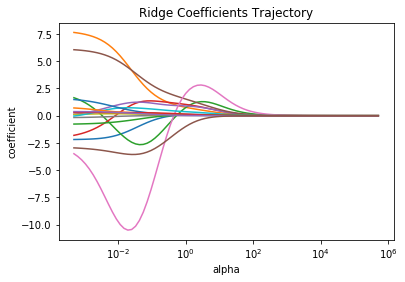

In [55]:
### Visualize the Ridge coefficient trajectories


# Generate an array of alpha values ranging from very big to very small.
alphas = 10**np.linspace(6,-3,80)*0.5

# now fit lasso
ridge = Ridge(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(pred_x, resp_y)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefficient')
plt.title('Ridge Coefficients Trajectory')

In [52]:
### Use cross-validation to find the optimal value of the regularization penalty

ridgecv = RidgeCV(alphas=alphas,normalize=True)
ridgecv.fit(pred_x, resp_y)
print("Optimal value of the regularization penality: ", ridgecv.alpha_)

Optimal value of the regularization penality:  0.011642831492490983


</br>

</br>

### 2. Short Answer Question. 
* Explain in your own words the bias-variance tradeoff
* What role does regularization play in this tradeoff? 
* Make reference to your findings in number (1) to describe models of high/low bias and variance

**1. Explain in your own words the bias-variance tradeoff.**

Bias is a is the amount your model prediction differs from the true value of the data. In shorter words, how much your model consistently makes mistakes. Variance is the deviation of your prediction, usually measured by the distance of the mean. Usually, one wants to add a bit of bias because this can improve prediction accuracy while at the price of a little bit of added variance, which is a perfect example of bias-variance tradeoff.

</br>

**2. What role does regularization play in this tradeoff?**

Regularization is a important method to control Bias and Variance, especially in the situation of overfitting. Regularization essentially reduces the complexity in the model either by getting rid of the complex features or reducing their importance.

</br>

**3. Make reference to your findings in number (1) to describe models of high/low bias and variance**

For both Lasso and Ridge models, we got very small value alphas which are about 0.06 and 0.01 respectively.When alpha = 0, the penalty term has no effect, hence both lasso and ridge regression produce the least squares estimates, which contains all the predictors. Therefore, both models have low bias but high variance